# Proyecto Final - Clasificación de imágenes con Vision Transformer
**EL7008-1 2023 Procesamiento Avanzado de Imágenes**<br>
**Profesor:** Javier Ruiz del Solar<br>
 **Auxiliar:** Patricio Loncomilla<br>
**Estudiante:** Luciano Vidal

Este Notebook está diseñado para ser ejecutado de forma independiente en Google Colab.

## Carga de modelo

A continuación se carga el modelo junto con los parámetros e imágenes de ejemplo desde Hugging Face, todo esto queda almacenado en el directorio `ViT-Yoga`.

En este directorio se incluyen 6 imágenes de ejemplo, cuyo nombre indica el índice de la clase a la que corresponden.

In [1]:
# Se cargan los modelos y parametros
!git lfs install
!git clone https://huggingface.co/LucianoVN/ViT-Yoga

Git LFS initialized.
Cloning into 'ViT-Yoga'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 2), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (17/17), 220.71 KiB | 4.90 MiB/s, done.


In [7]:
# Librerias utilizadas
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Se carga la arquitectura diseñada
import sys
sys.path.append('ViT-Yoga')
from vit_model import MyViT

In [3]:
# se cargan los parametros entrenados del modelo con 6 clases
model = MyViT(num_classes=6)
model.load_state_dict(torch.load('ViT-Yoga/best_model_vit_level_3.pt',
                                 map_location=torch.device('cpu')))
model.eval()
print('Modelo cargado exitosamente')

Modelo cargado exitosamente


## Prueba

A continuación se leen las imagenes y se aplica el modelo de clasificación, mostrando los resultados.

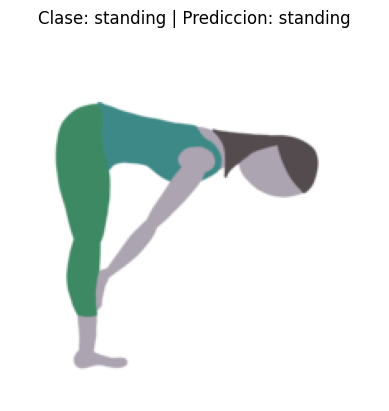

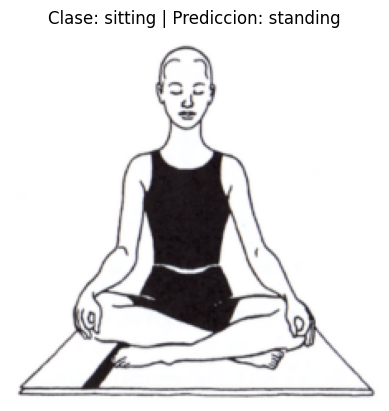

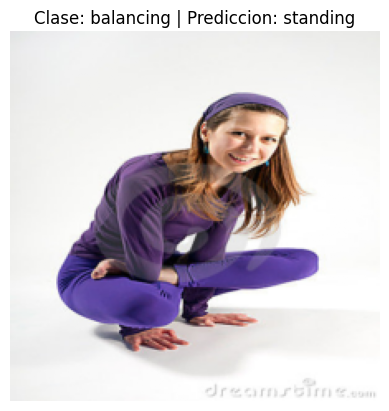

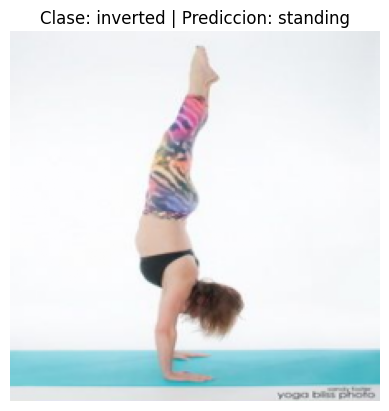

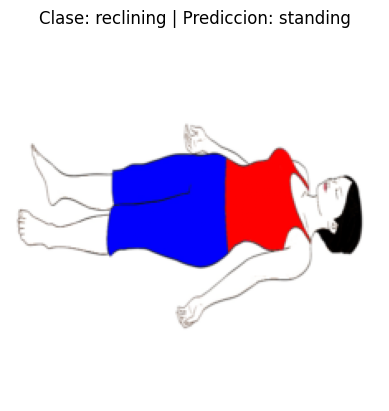

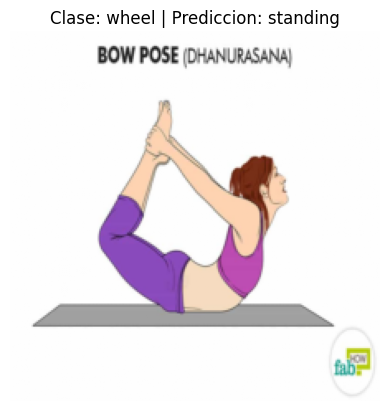

In [11]:
# diccionario con el nombre de la clase que corresponde a cada indice
class_names = {0: 'standing',
               1: 'sitting',
               2: 'balancing',
               3: 'inverted',
               4: 'reclining',
               5: 'wheel'}

# transformaciones aplicadas a las imagenes
img_transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.ToTensor()])

# se recorren todas las imagenes
for idx in range(6):
    # se lee el contenido de la imagen
    img = Image.open(f'ViT-Yoga/{idx}.jpg')
    # se transforma a un formato que el modelo puede leer
    img = img_transform(img)
    img = torch.unsqueeze(img,0)

    with torch.no_grad():
        # se evalua el modelo
        outputs = model(img)

        # se obtiene el indice de la prediccion
        softmax = torch.nn.Softmax(dim=1)
        probs = softmax(model(img))
        prediction = torch.max(outputs.data, 1)[1].item()

    # se muestran los resultados graficamente
    plt.imshow(img[0].permute(1,2,0))
    plt.title(f'Clase: {class_names[idx]} | Prediccion: {class_names[prediction]}')
    plt.axis('off')
    plt.show()

**Importante**: Aquí notar que sin importar la imagen que se entregue el modelo tiene un sesgo a siempre clasificar las imágenes con la clase *standing*, lo cual se relaciona con la dificultad que se tiene al entrenar con los tipos de imagenes utilizadas, donde los parámetros del modelo convergen de forma de siempre realizar la misma clasificación y el entrenamiento no es capaz de mejorar este escenario.